In [ ]:
#Mert AÇIKGÖZ
#Fatih AKTAŞ
#İsa ERGÜN
#Mesut HARDAL
#Emre MENOKAN
#Oğuzhan TANRIKULU
#
#PYTHON İLE İKİNCİ EL OTO VERİSİ REGRESYON ANALİZİ
#

In [205]:
#kutuphanelerin import islemi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [206]:
#kullanilacak verinin dataframe'e import islemi
df_ham = pd.read_csv("C:\\Users\\oguzh\\Desktop\\craigslistVehicles.csv", engine='python')
df = df_ham

In [207]:
#ilk on satırın gosterilmesi
df.head(10)

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,...,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,...,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130100,-100.234400
1,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,...,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648368,-97.862949
2,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,...,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.648516,-97.862434
3,https://abilene.craigslist.org/cto/d/merkel-20...,"abilene, TX",https://abilene.craigslist.org,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,...,automatic,NaN,4wd,NaN,pickup,white,https://images.craigslist.org/00M0M_2wKzc7dKLU...,2002 GMC Sierra Extended Cab Truck For Sale! R...,32.444400,-99.992400
4,https://abilene.craigslist.org/cto/d/breckenri...,"abilene, TX",https://abilene.craigslist.org,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,...,automatic,NaN,4wd,full-size,pickup,silver,https://images.craigslist.org/00r0r_eW1YWlKfCG...,"2012 Chevrolet 3500 178k miles, runs and drive...",32.781689,-98.942248
5,https://abilene.craigslist.org/cto/d/abilene-t...,"abilene, TX",https://abilene.craigslist.org,3700,2003.0,NaN,F150,fair,8 cylinders,gas,...,automatic,NaN,4wd,NaN,pickup,silver,https://images.craigslist.org/00B0B_bNij1P41ZV...,Silver 2003 F150 Triton v8-plugs have been cha...,32.579641,-99.663505
6,https://abilene.craigslist.org/ctd/d/arlington...,"abilene, TX",https://abilene.craigslist.org,19950,2013.0,ford,f-250,NaN,8 cylinders,gas,...,automatic,1FT7W2B6XDEA83407,4wd,full-size,pickup,white,https://images.craigslist.org/00b0b_kG4tvu7JnK...,DKR IncAsk for: Paul or RandyÃ¢Â˜Â�Ã‚Â (817) 2...,32.736030,-97.133644
7,https://abilene.craigslist.org/ctd/d/leander-2...,"abilene, TX",https://abilene.craigslist.org,19999,2006.0,ram,2500,NaN,NaN,diesel,...,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00U0U_5O1RuUwApr...,www.GETADIESEL.com\n\n2006 DODGE RAM 3500 SLT ...,30.647777,-97.862434
8,https://abilene.craigslist.org/ctd/d/arlington...,"abilene, TX",https://abilene.craigslist.org,33950,2015.0,ford,f-350,NaN,8 cylinders,diesel,...,automatic,1FT8W3BT8FEA10264,4wd,full-size,pickup,white,https://images.craigslist.org/01313_8in7fCHjBu...,DKR IncAsk for: Paul or RandyÃ¢Â˜Â�Ã‚Â (817) 2...,32.754000,-97.134800
9,https://abilene.craigslist.org/ctd/d/arlington...,"abilene, TX",https://abilene.craigslist.org,25950,2015.0,ford,f-350,NaN,8 cylinders,gas,...,automatic,1FD8X3H67FEC83237,4wd,NaN,truck,white,https://images.craigslist.org/00z0z_5wuoYE7kg6...,DKR IncAsk for: Paul or RandyÃ¢Â˜Â�Ã‚Â (817) 2...,32.736030,-97.133644


In [208]:
#satir ve sutun gosterimi
df.shape

(550313, 22)

In [209]:
#numerik satirlarin istatitikleri
df.describe()

,price,year,odometer,lat,long
count,5.503130e+05,548826.000000,4.395130e+05,538523.000000,538523.000000
mean,9.398773e+04,2008.709121,1.037676e+05,38.446760,-93.849082
std,1.242762e+07,9.610097,2.126622e+05,5.822595,17.611870
min,0.000000e+00,1900.000000,0.000000e+00,-81.884981,-178.154297
25%,3.790000e+03,2006.000000,5.057600e+04,34.724400,-106.369340
50%,8.988000e+03,2011.000000,9.648300e+04,39.124000,-88.160859
75%,1.750000e+04,2015.000000,1.400480e+05,42.389954,-80.801896
max,3.787877e+09,2020.000000,1.021028e+08,84.151686,122.367000


In [210]:
#kolonların gosterilmesi
df.columns

Index(['url', 'city', 'city_url', 'price', 'year', 'manufacturer', 'make',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'desc', 'lat', 'long'],
      dtype='object')

In [211]:
for i in range(len(df.columns)):
    print(df.iloc[:,i].unique()) # kolon distinct değerlerinin gosterimi      

['https://abilene.craigslist.org/cto/d/aspermont-2009-chevrolet-suburban-lt/6977351526.html'
 'https://abilene.craigslist.org/ctd/d/liberty-hill-2012-ram-2500-slt-mega-cab/6977347322.html'
 'https://abilene.craigslist.org/ctd/d/liberty-hill-2003-dodge-ram-3500/6977302857.html'
 ...
 'https://zanesville.craigslist.org/cto/d/blue-rock-03-chrysler/6978563203.html'
 'https://zanesville.craigslist.org/cto/d/senecaville-1988-berretta/6978539224.html'
 'https://zanesville.craigslist.org/cto/d/norwich-international/6978149032.html']
['abilene, TX' 'albany, GA' 'albany, NY' 'altoona-johnstown'
 'amarillo, TX' 'ames, IA' 'annapolis, MD' 'ann arbor, MI'
 'appleton-oshkosh-FDL' 'asheville, NC' 'ashtabula, OH' 'athens, GA'
 'athens, OH' 'auburn, AL' 'augusta, GA' 'bakersfield, CA' 'baton rouge'
 'battle creek, MI' 'beaumont / port arthur' 'bellingham, WA'
 'bemidji, MN' 'billings, MT' 'binghamton, NY' 'birmingham, AL'
 'bismarck, ND' 'bloomington, IN' 'bloomington-normal' 'boone, NC'
 'boulder, CO'

['gas' 'diesel' 'hybrid' 'other' nan 'electric']
[217743.     nan 195000. ... 143061. 122953. 142779.]
['clean' 'missing' 'lien' 'rebuilt' 'salvage' nan 'parts only']
['automatic' 'manual' 'other' nan]
['1GFNC26099R211276' nan '1FT7W2B6XDEA83407' ... '1G1105S39JU139149'
 '3TMMU4FN2BM027684' '1HTLCHL9HH465202']
['rwd' nan '4wd' 'fwd']
['full-size' nan 'mid-size' 'compact' 'sub-compact']
['SUV' nan 'pickup' 'truck' 'van' 'hatchback' 'sedan' 'coupe' 'wagon'
 'mini-van' 'other' 'convertible' 'bus' 'offroad']
['white' nan 'silver' 'red' 'black' 'blue' 'grey' 'brown' 'purple'
 'orange' 'green' 'custom' 'yellow']
['https://images.craigslist.org/00909_5P6f1E6zHlj_600x450.jpg'
 'https://images.craigslist.org/00u0u_24XW8uhLYPb_600x450.jpg'
 'https://images.craigslist.org/00l0l_H1UKTJ4sTI_600x450.jpg' ...
 'https://images.craigslist.org/01313_1hKoSyjUQ0l_600x450.jpg'
 'https://images.craigslist.org/00y0y_cK2ODyIXNEn_600x450.jpg'
 'https://images.craigslist.org/00505_6bsGXoHb5qm_600x450.jpg']
['2W

In [212]:
#data tiplerinin gosterimi
df.dtypes

url              object
city             object
city_url         object
price             int64
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
desc             object
lat             float64
long            float64
dtype: object

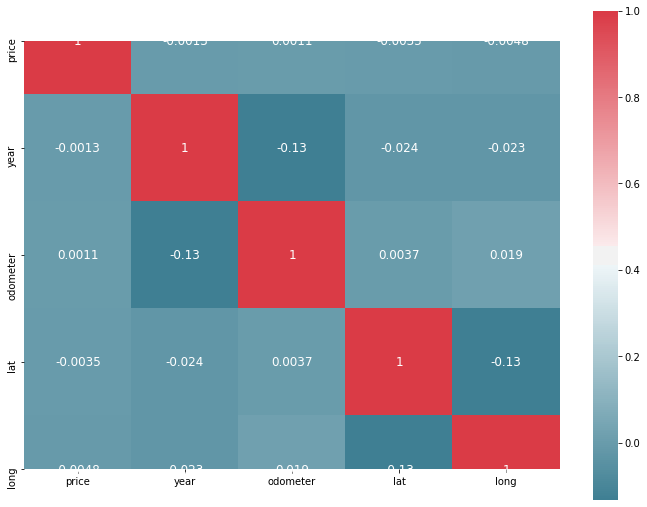

In [213]:
# numerik sutunların korelasyonlarinin plot ile gosteren fonksiyon
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(df)

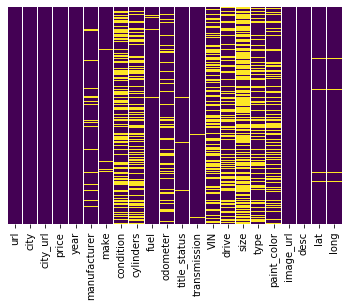

In [214]:
#eksik degerlerin grafiksel gosterimi
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # missing value check

In [215]:
#kolonlardaki null değerlerin gösterilmesi
for i in range(len(df.columns)):
    x = df.columns[i]
    print(x, '-', df[df[x].isnull() == True].shape)

url - (0, 22)
city - (0, 22)
city_url - (0, 22)
price - (0, 22)
year - (1487, 22)
manufacturer - (26915, 22)
make - (9677, 22)
condition - (250074, 22)
cylinders - (218997, 22)
fuel - (4741, 22)
odometer - (110800, 22)
title_status - (4024, 22)
transmission - (4055, 22)
VIN - (239238, 22)
drive - (165838, 22)
size - (366256, 22)
type - (159179, 22)
paint_color - (180021, 22)
image_url - (26, 22)
desc - (30, 22)
lat - (11790, 22)
long - (11790, 22)


In [216]:
#belirli kolonların silinmesi
df.drop(columns = ['url', 'city_url', 'image_url','size', 'VIN', 'lat', 'long'], axis=1,inplace=True)

In [217]:
df.shape

(550313, 15)

In [218]:
df_make_manufacturer_dropna = df.dropna(subset = ["make", "manufacturer"]) 
#dictionary olusturmadan önce missing value'ları drop ediyoruz, dictionary'nin hatalı olusaması için
dict_make_manufacturer = pd.Series(df_make_manufacturer_dropna.manufacturer.values,index=df_make_manufacturer_dropna.make).to_dict()
#make ve manufacturer için dictionary oluşturuyoruz.
df.manufacturer = df.manufacturer.fillna(df.make.map(dict_make_manufacturer))
#dictionary ile dataframe'in make alanlarını map edip, dictionary'nin manufacturer alanı ile df'in manufacturer = nan olanları
#güncelliyoruz
df[df.manufacturer.isnull() == True].shape #26915 - 25585 = 1330 tane missing value doldurduk

(25585, 15)

In [219]:
df_make_drive_dropna = df.dropna(subset = ["make", "drive"])
#dictionary olusturmadan önce missing value'ları drop ediyoruz, dictionary'nin hatalı olusaması için
dict_make_drive = pd.Series(df_make_drive_dropna.type.values,index=df_make_drive_dropna.make).to_dict()
#make ve drive için dictionary oluşturuyoruz.
df.drive = df.drive.fillna(df.make.map(dict_make_drive))
#dictionary ile dataframe'in make alanlarını map edip, dictionary'nin drive alanı ile df'in drive = nan olanları
#güncelliyoruz
df[df.drive.isnull() == True].shape # 165818 - 49519 = 116299 tane missing value doldurduk

(49519, 15)

In [220]:
df_make_type_dropna = df.dropna(subset = ["make", "type"])
#dictionary olusturmadan önce missing value'ları drop ediyoruz, dictionary'nin hatalı olusaması için
dict_make_type = pd.Series(df_make_type_dropna.type.values,index=df_make_type_dropna.make).to_dict()
#make ve type için dictionary oluşturuyoruz.
df.type = df.type.fillna(df.make.map(dict_make_type))
#dictionary ile dataframe'in make alanlarını map edip, dictionary'nin type alanı ile df'in type = nan olanları
#güncelliyoruz
df[df.type.isnull() == True].shape # 159179 - 21821 =  137358 tane missing value doldurduk

(21821, 15)

In [221]:
# bu noktada odometer'ın nan değerleri year'ın ortalamalarına göre dolacak --> OK

In [222]:
df[(df['year'] == 2015.0)]['odometer'].mean() # 2015 senesinin mean odometer değeri (nan için kod çalıştığında kontrol için)

73464.79844937855

In [223]:
# 2014 senesinin mean odometer değeri (nan degerler için fonksiyon çalıştıktan sonra kontrol için)
df[(df['year'] == 2014.0)]['odometer'].mean() 

84611.46407056083

In [224]:
#global olarak kullanıyoruz 
dict_odometer_mean = {} # year ve mean dictionary değişkeni

# nan odometer değerleri için mean değerlerini hesaplayan fonksiyon
def calc_nanvalues_mean_func(x,y): 
    global  dict_odometer_mean    
    if (math.isnan(y) == True):
        if x not in dict_odometer_mean:
            val = df[(df['year'] == x)]['odometer'].mean()
            return dict_odometer_mean.update({x:val})
        else:
            return dict_odometer_mean.get(x)
    else:
        return y

In [225]:
import math

In [226]:
# calc_nanvalues_mean_func fonksiyonunun her bir satır için çalıştırılması 
df['odometer'] =  df.apply(lambda x: calc_nanvalues_mean_func(x['year'],  x['odometer']), axis=1)  

In [227]:
#fonksiyon sonrasi kontrol icin
df[(df['year'] == 2014.0) & (df['price'] == 39999) & (df['title_status'] == 'clean')] #check

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,desc
21,"abilene, TX",39999,2014.0,ford,f250,NaN,NaN,diesel,NaN,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
468,"amarillo, TX",39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
6026,"college station, TX",39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
17176,killeen / temple / ft hood,39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
21024,mcallen / edinburg,39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
25180,odessa / midland,39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
28826,"san angelo, TX",39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
32028,"springfield, IL",39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
34969,tyler / east TX,39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...
35631,"waco, TX",39999,2014.0,ford,f250,NaN,NaN,diesel,84611.464071,clean,automatic,truck,truck,NaN,www.GETADIESEL.com\n\n2014 FORD F250 LARIAT 4X...


In [228]:
# bu noktada tum outlierlar temizlenmeli

In [229]:
df.shape

(550313, 15)

In [230]:
y = df['price']
removed_outliers = y.between(y.quantile(.10), y.quantile(.90))

In [231]:
df = df[removed_outliers]

In [232]:
df.shape

(440305, 15)

In [233]:
#bu noktada year'ın outlier'ları drop edilmeli!

In [234]:
#1989 öncesi ve == 2020 icin  veri az olduğu için alınmıyor..
df = df[(df['year'] > 1989) & (df['year'] < 2020)] #??? kayıt alındı.

In [235]:
df.shape

(422387, 15)

In [236]:
for i in range(len(df.columns)):
    print(df.iloc[:,i].value_counts()) # kolonların dağılımı

akron / canton          2622
rhode island            2599
hartford, CT            2588
grand rapids, MI        2571
north jersey            2561
                        ... 
west virginia (old)       39
southwest MS              28
southwest TX              28
ogden-clearfield          26
del rio / eagle pass      23
Name: city, Length: 413, dtype: int64
3500     4960
2500     4807
5995     4464
6995     4447
4500     4415
         ... 
15198       1
19536       1
21587       1
10437       1
6147        1
Name: price, Length: 12833, dtype: int64
2012.0    29127
2013.0    28946
2008.0    28750
2007.0    27586
2011.0    27504
2016.0    26310
2014.0    25952
2015.0    24671
2006.0    23961
2010.0    23055
2005.0    20771
2009.0    19056
2004.0    17847
2017.0    16253
2003.0    14608
2018.0    11551
2002.0    11494
2001.0     9216
2000.0     7278
1999.0     6077
1998.0     4222
1997.0     3577
2019.0     3190
1995.0     2342
1996.0     2300
1994.0     1903
1993.0     1409
1992.0     1181


In [237]:
#toplam 4 satır datası olduğu için alınmayacaklar
df = df[df['manufacturer'] != 'hennessey']
df = df[df['manufacturer'] != 'morgan']

In [238]:
#index reset islemi
df = df.reset_index(drop=True)

In [239]:
#kalan eksik verilerin silinmesi islemi
df = df.dropna()
df.columns

Index(['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'desc'],
      dtype='object')

In [240]:
df.shape

(164162, 15)

In [241]:
#float verilerin int donusumu
df['year'] = df['year'].astype(np.int64)
df['odometer'] = df['odometer'].astype(np.int64)
df.dtypes

city            object
price            int64
year             int64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer         int64
title_status    object
transmission    object
drive           object
type            object
paint_color     object
desc            object
dtype: object

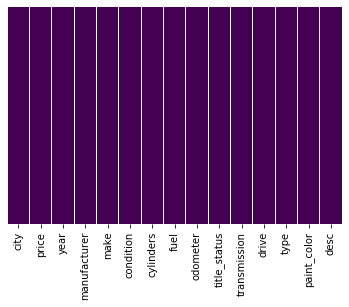

In [124]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # OK!!!, eksik veri kalmadi.

In [242]:
df = df.reset_index(drop=True)

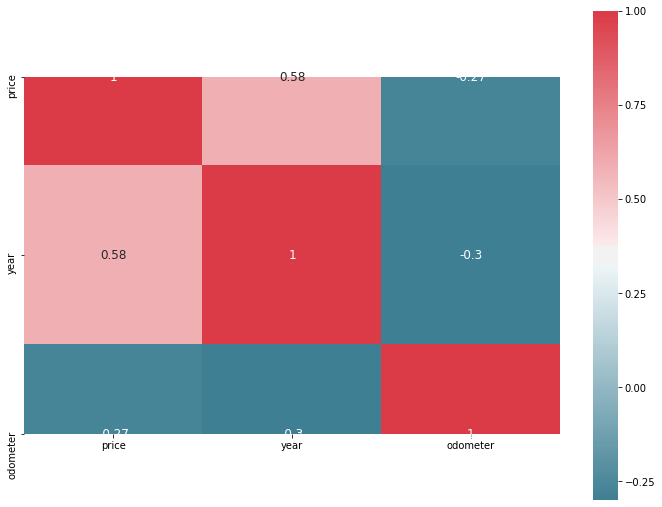

In [126]:
plot_correlation_map(df)

In [243]:
drive = pd.get_dummies(df['drive'], prefix = 'drive')
df.drop('drive', axis=1,inplace=True)
df = pd.concat([df, drive],axis=1)

In [244]:
type = pd.get_dummies(df['type'], prefix = 'type')
df.drop('type', axis=1,inplace=True)
df = pd.concat([df, type],axis=1)

In [245]:
transmission = pd.get_dummies(df['transmission'], prefix = 'transmission')
df.drop('transmission', axis=1,inplace=True)
df = pd.concat([df, transmission],axis=1)

In [246]:
paint_color = pd.get_dummies(df['paint_color'], prefix = 'paint_color')
df.drop('paint_color', axis=1,inplace=True)
df = pd.concat([df, paint_color],axis=1)

In [247]:
title_status = pd.get_dummies(df['title_status'], prefix = 'title_status')
df.drop('title_status', axis=1,inplace=True)
df = pd.concat([df, title_status],axis=1)

In [248]:
manufacturer = pd.get_dummies(df['manufacturer'], prefix = 'manufacturer')
df.drop('manufacturer', axis=1,inplace=True)
df = pd.concat([df, manufacturer],axis=1)

In [249]:
cylinders = pd.get_dummies(df['cylinders'], prefix = 'cylinders')
df.drop('cylinders', axis=1,inplace=True)
df = pd.concat([df, cylinders],axis=1)

In [250]:
condition = pd.get_dummies(df['condition'], prefix = 'condition')
df.drop('condition', axis=1,inplace=True)
df = pd.concat([df, condition],axis=1)

In [251]:
fuel = pd.get_dummies(df['fuel'], prefix = 'fuel')
df.drop('fuel', axis=1,inplace=True)
df = pd.concat([df, fuel],axis=1)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164162 entries, 0 to 164161
Columns: 112 entries, city to fuel_other
dtypes: int64(3), object(3), uint8(106)
memory usage: 24.1+ MB


In [253]:
df.shape

(164162, 112)

In [254]:
len(df.city.unique())

413

In [255]:
df.head()

,city,price,year,make,odometer,desc,drive_4wd,drive_SUV,drive_bus,drive_convertible,...,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,"abilene, TX",9000,2009,suburban lt2,217743,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,"abilene, TX",6000,2002,sierra 1500,195000,2002 GMC Sierra Extended Cab Truck For Sale! R...,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,"abilene, TX",9700,2010,srx luxury collection,140000,My last child has graduated and I no longer ne...,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,"abilene, TX",2500,2001,silverado 1500,220000,2001 SILVERADO 1500 Ext Cab Shortbed. $2500 ca...,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,"abilene, TX",11995,2011,acadia denali,140000,"COME BY AND SEE THIS LOADED GMC DENALI ACADIA,...",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [256]:
len(df.make.unique())

13489

In [257]:
df.columns

Index(['city', 'price', 'year', 'make', 'odometer', 'desc', 'drive_4wd',
       'drive_SUV', 'drive_bus', 'drive_convertible',
       ...
       'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other'],
      dtype='object', length=112)

In [258]:
df['odometer'].value_counts().count() #57841 farklı km var.

49954

In [143]:
df.shape

(164162, 112)

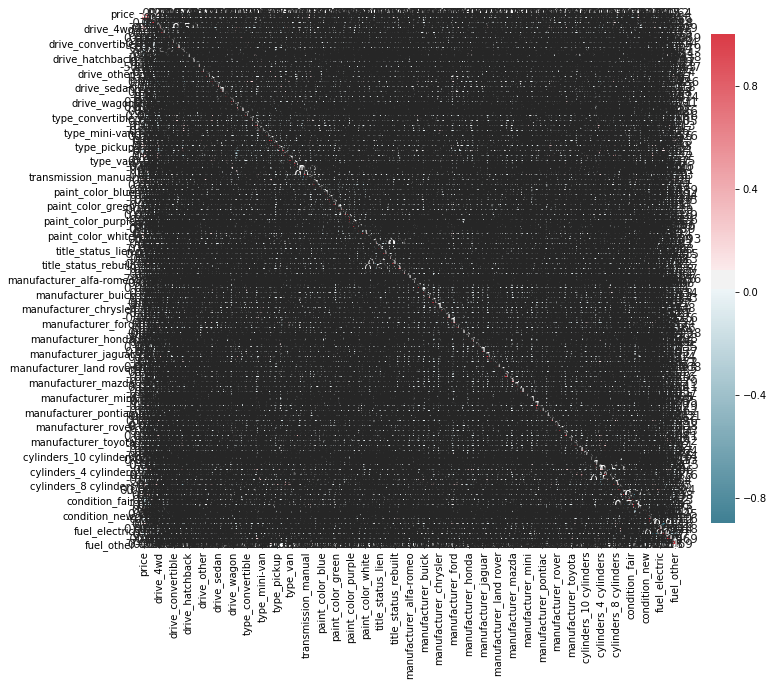

In [125]:
plot_correlation_map(df)

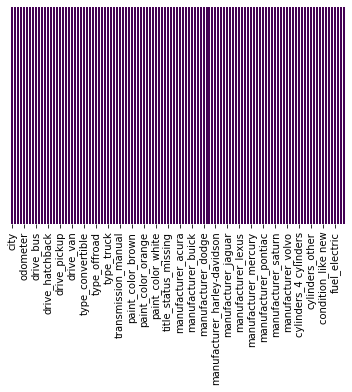

In [259]:
#eksik degerlerin grafiksel gosterimi
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # missing value check

In [260]:
df.head()



,city,price,year,make,odometer,desc,drive_4wd,drive_SUV,drive_bus,drive_convertible,...,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,"abilene, TX",9000,2009,suburban lt2,217743,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,"abilene, TX",6000,2002,sierra 1500,195000,2002 GMC Sierra Extended Cab Truck For Sale! R...,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,"abilene, TX",9700,2010,srx luxury collection,140000,My last child has graduated and I no longer ne...,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,"abilene, TX",2500,2001,silverado 1500,220000,2001 SILVERADO 1500 Ext Cab Shortbed. $2500 ca...,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,"abilene, TX",11995,2011,acadia denali,140000,"COME BY AND SEE THIS LOADED GMC DENALI ACADIA,...",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [261]:
df.drop('make', axis=1,inplace=True)
df.drop('desc', axis=1,inplace=True)

In [262]:
df.shape

(164162, 110)

In [263]:
#lineer regresyon importu
from sklearn.linear_model import LinearRegression

In [264]:
#model değişkeni oluşturma
reg = LinearRegression()

In [265]:
#Bağımlı ve bağımsız değişkenlerin belirtilmesi
labels = df['price']
train1 = df.drop(["city",'price'],axis=1)

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.33,random_state =2)

In [268]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(x_train)
#X_test  = sc.fit_transform(x_test)
#Y_train = sc.fit_transform(np.array(y_train).reshape(-1,1))
#Y_test  = sc.fit_transform(np.array(y_test).reshape(-1,1))

In [269]:
#Lineer Regresyon Modelinin eğitilmesi
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
#Lineer Gegresyon modeli test verisinin tahmin edilmesi
tahmin = reg.predict(x_test)
print(tahmin)

[15463.58984357 13864.08297957 12508.04861084 ...  3316.7843446
  6813.50166782 11952.0149243 ]


In [287]:
from sklearn.metrics import r2_score

In [288]:
from sklearn.metrics import mean_squared_error

# predicting on training data-set
y_train_predicted = reg.predict(x_train)
  
# predicting on test data-set
y_test_predict = tahmin
  
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The Linear Regression model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The Linear Regression model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The Linear Regression model performance for the training set
-------------------------------------------
RMSE of training set is 3984.847555732764
R2 score of training set is 0.6428248597864326


The Linear Regression model performance for the test set
-------------------------------------------
RMSE of test set is 4029.0961700614375
R2 score of test set is 0.636387704461137


In [274]:
#sklearn kütüphanesinden başka bir r2 hesaplayan fonksiyon ile sağlama işlemi
r2_score(y_test,tahmin)

0.636387704461137

In [275]:
#Gradient Boosting Regressor Modelinin Kullanımı
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [276]:
#Gradient Boosting Regressor Modelinin eğitilmesi
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [284]:
#GradientBoostingRegressor modeli test verisinin tahmin edilmesi
tahmin = clf.predict(x_test)
print(tahmin)

[15426.30367888 17235.43503442  9395.77762747 ...  2642.73123443
  5019.13185984 13594.63265251]


In [285]:
from sklearn.metrics import mean_squared_error

# predicting on training data-set
y_train_predicted = clf.predict(x_train)
  
# predicting on test data-set
y_test_predict = tahmin
  
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The Gradient Boosting Regressor model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The Gradient Boosting Regressor model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The Gradient Boosting Regressor model performance for the training set
-------------------------------------------
RMSE of training set is 2676.293002578639
R2 score of training set is 0.8388890280427543


The Gradient Boosting Regressor model performance for the test set
-------------------------------------------
RMSE of test set is 2846.885450758004
R2 score of test set is 0.8184637838334818
